## Week 4 Assignment - Part 1
 This week I will review the work I have done so far, in particular:
 1) Joining of the csv and shapefile 
 2) Doing Data Exploration with the following on socio-demographic variables and attitudes towards race/population groups
 
 In terms of outputs, I will aim to reproduce what I have done in previous weeks and also analyse additional variables that are of interest to our study.  


In [1]:
# Importing all packages that will be necessary for the data exploration 

# Importing the pandas library 
import pandas as pd

#For creating or removing a directory folder
import os

#To allow me to work with numerical data
import numpy as np

# for spatial data
import geopandas as gpd

# for plotting
import matplotlib.pyplot as plt

# for network analysis
import networkx as nx

# for street network analysis
import osmnx as ox

# for basemaps
import contextily as ctx

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


Importing CSV file and packages needed for this assignment


In [ ]:
qol17=pd.read_csv('qols-v-2017-2018-v1.1.csv')

Importing ward shapefile


In [ ]:
wards_shp=gpd.read_file("MDB_Wards_2020.shp")

Renaming the wards and WardID column, so that the files can be joined. The head command allows us to see whether the renaming was successful



In [ ]:
qol17=qol17.rename(columns={"ward":"WardID"})

qol17.head(3)

Before joining, it is useful to check whether the data types for the csv and the shapefile are the same, as I otherwise won't be able to join them. 


In [ ]:
qol17.dtypes

In [6]:
wards_shp.dtypes

FID              int64
Province        object
Municipali      object
CAT_B           object
WardNo           int64
District        object
DistrictCo      object
Date            object
WardID          object
WardLabel       object
Shape__Are     float64
Shape__Len     float64
geometry      geometry
dtype: object

We can see that the WardID is a int64 for the qol17 file and an object for the wards shapefile. In order for them to be the same, I will convert both to int64 and use the dtypes command to see wether that was successful.

In [ ]:
wards_shp['WardID'] = wards_shp['WardID'].astype(int)

wards_shp.dtypes

Now to the joining/merge of the shapefile and the csv, which I am renaming to call wards_merg. I will view this again with the head command


In [ ]:
wards_mer = wards_shp.merge(qol17, on='WardID')

In [9]:
wards_mer.head(3)

,FID,Province,Municipali,CAT_B,WardNo,District,DistrictCo,Date,WardID,WardLabel,...,Q17_02_5,Q17_02_6,Q17_02_7,Q17_02_8,Q17_02_9,Q17_02_10,Q17_02_11,Q17_02_12,Q17_02_13,Q17_02_14
0,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,...,Yes,No,No,No,No,No,No,No,No,No
1,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,...,No,No,No,No,No,No,No,No,No,No
2,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,...,No,No,No,No,No,No,Yes,No,No,No


Now I try to plot the region from the merged file so that I get a better idea of what the area looks like.

Text(0.5, 1.0, 'Gauteng Districts')

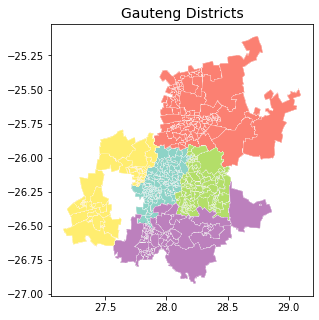

In [10]:
wards_mer.plot(figsize=(5,5),
                   column='District',
           cmap='Set3',
                   edgecolor='white',
                   linewidth=0.2,
                   legend=False,
                  )
plt.title('Gauteng Districts', fontsize=14)

I can see that a whole area of Gauteng is missing, which my partner and I identified as Rand City West. We are unsure why this is happening, but I will continue knowing that we are loosing data in the merge. 

I didn't clean the data in excel, so instead I will clean the data through Python. To do so I first need to list all the columns



In [ ]:
list(wards_mer)

After deciding which columns to keep, I use the following command to get rid of the columns I don't need

In [12]:

columns_to_keep =['FID',
 'Province',
 'Municipali',
 'CAT_B',
 'WardNo',
 'District',
 'DistrictCo',
 'Date',
 'WardID',
 'WardLabel',
 'Shape__Are',
 'Shape__Len',
 'geometry',
 'resp_id',
 'munic',
 'munic_recode',
 'region',
 'adults_listed',
 'males_listed',
 'females_listed',
 'weight',
 'A1_Pop_group',
 'A2_Sex',
 'Q2_11_street_lights',
 'Q3_02_country',
 'Q3_10_Retirement',
 'Q4_03_community',
 'Q8_06_idp',
 'Q9_02_infl_dev',
 'Q9_07_foreigners',
 'Q9_10_BW_trust',
 'Q9_12_foreigners',
 'Q9_15_Black_opport_more',
 'Q9_16_Violenc_LBG',
 'Q9_20_Interracial_dating',
 'Q12_03_day',
 'Q12_04_night', 
 'Q15_02_age',
 'Q15_02_age_recode',
 'Q15_20_income']

I cut down the list of columns with the following command and then list them

In [13]:
wards_mer = wards_mer[columns_to_keep]

In [14]:
list(wards_mer)

['FID',
 'Province',
 'Municipali',
 'CAT_B',
 'WardNo',
 'District',
 'DistrictCo',
 'Date',
 'WardID',
 'WardLabel',
 'Shape__Are',
 'Shape__Len',
 'geometry',
 'resp_id',
 'munic',
 'munic_recode',
 'region',
 'adults_listed',
 'males_listed',
 'females_listed',
 'weight',
 'A1_Pop_group',
 'A2_Sex',
 'Q2_11_street_lights',
 'Q3_02_country',
 'Q3_10_Retirement',
 'Q4_03_community',
 'Q8_06_idp',
 'Q9_02_infl_dev',
 'Q9_07_foreigners',
 'Q9_10_BW_trust',
 'Q9_12_foreigners',
 'Q9_15_Black_opport_more',
 'Q9_16_Violenc_LBG',
 'Q9_20_Interracial_dating',
 'Q12_03_day',
 'Q12_04_night',
 'Q15_02_age',
 'Q15_02_age_recode',
 'Q15_20_income']

A lot of the variables are shown in a scale from for example strongly agree to strongly disagree. In order to map these, I recode the variables to give them numeric values and then take the mean of each ward. I first do this with the variablae BW trust and use the loc command.



In [15]:
wards_mer[['Q9_10_BW_trust']]
wards_mer [['bw_trust_2']]=np.nan
wards_mer [['bw_trust_2']]

wards_mer.loc[wards_mer['Q9_10_BW_trust']=='Strongly disagree','bw_trust_2']=0
wards_mer.loc[wards_mer['Q9_10_BW_trust']=='Disagree','bw_trust_2']=1
wards_mer.loc[wards_mer['Q9_10_BW_trust']=='Neither agree nor disagree','bw_trust_2']=2
wards_mer.loc[wards_mer['Q9_10_BW_trust']=='Agree','bw_trust_2']=3
wards_mer.loc[wards_mer['Q9_10_BW_trust']=='Strongly agree','bw_trust_2']=4
wards_mer [['Q9_10_BW_trust','bw_trust_2']]

/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Q9_10_BW_trust,bw_trust_2
0,Strongly agree,4.0
1,Strongly agree,4.0
2,Agree,3.0
3,Strongly agree,4.0
4,Agree,3.0
...,...,...
23601,Disagree,1.0
23602,Agree,3.0
23603,Agree,3.0
23604,Disagree,1.0


create ward level dataset with ward mean bw_trust variable

In [16]:
wards_mer_bw = wards_mer.groupby("WardID").mean('bw_trust_2') [["bw_trust_2"]]

check ward level trust var

In [ ]:
wards_mer_bw.head(3)

merge ward level trust var back to ward level shape data (again)

In [18]:

wards_mer_2 = wards_mer.merge(wards_mer_bw, on='WardID')

wards_mer_2.head(3)

,FID,Province,Municipali,CAT_B,WardNo,District,DistrictCo,Date,WardID,WardLabel,...,Q9_15_Black_opport_more,Q9_16_Violenc_LBG,Q9_20_Interracial_dating,Q12_03_day,Q12_04_night,Q15_02_age,Q15_02_age_recode,Q15_20_income,bw_trust_2_x,bw_trust_2_y
0,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,...,Strongly disagree,Strongly disagree,Agree,Bit unsafe,Very unsafe,35,35-39,R1 601 - R3 200,4.0,3.018182
1,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,...,Strongly disagree,Strongly disagree,Agree,Very unsafe,Very unsafe,28,25-29,R6 401 - R12 800,4.0,3.018182
2,2896,Gauteng,City of Johannesburg Metropolitan Municipality,JHB,1,City of Johannesburg,JHB,2020-11-26,79800001,JHB_1,...,Neither agree nor disagree,Disagree,Neither agree nor disagree,Fairly safe,Bit unsafe,62,60-64,R1 601 - R3 200,3.0,3.018182


I try to plot the data to show the attitudes towards other populations in the Gauteng region. I have analysed the results below.

Text(0.5, 1.0, 'Attitudes towards other population groups in Gauteng')

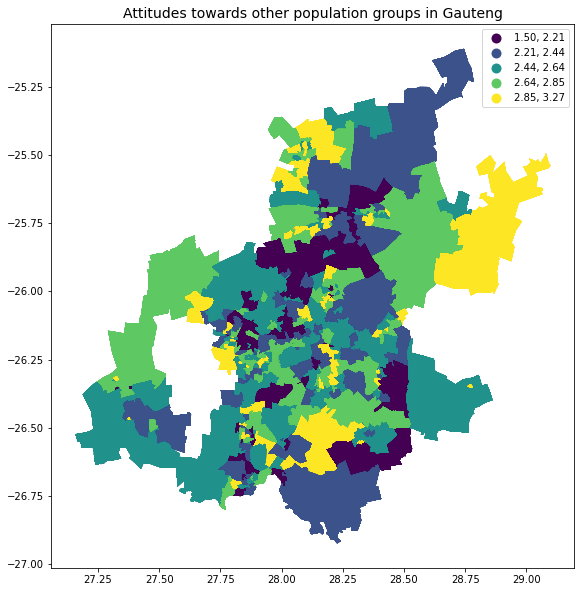

In [24]:


wards_mer_2.plot(figsize=(12,10),
                 column='bw_trust_2_y',
                 legend=True, 
                 scheme='NaturalBreaks')

plt.title('Attitudes towards other population groups in Gauteng', fontsize=14)

What we can see in this map is that those areas that are shaded darker, are areas where more people strongly disagreed with the statement that "Black and Whites will never really trust each other". The yellow shaded areas, are wards where respondents strongly agreed with the aforementioned statement. We can conclude that there is a lot of variation in trust across the Gauteng area.

As my Kernel keeps on dying, I will try to delete dataframes that I don't need any more to save some memory. 

In [ ]:
del qol17

In [22]:
del wards_shp


After running these two delete commands, it seems that little memory has been saved and the memory is still almost full. Perhaps the commands I am running are using a lot of memory?  

## As I am not sure what to do about the kernel dying, I have decided to start a new notebook for the next set of data exploration